In [109]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
from darts.models import RegressionModel
%matplotlib inline

In [177]:
# Miscellaneous Info related to Canadian population, including Ontario, Alberta, Quebec, British Columbia, and Nunavut.
# Also contains info regarding the largest canadian telecomms revenue and expenditures

#Imports and Cleans data
GDPdata = pd.read_csv("C:/Users/alexa/Documents/ITEC 5910 Proj/MiscellaneousInfo.csv")

#Drops the extra rows at the bottom with na values

#fills any NA values in table
GDPdata = GDPdata.fillna(0)

In [222]:
#Removing all String Symbols that could obfuscate the data
GDPdata = GDPdata.replace(',','', regex=True)
GDPdata = GDPdata.replace('$', '', regex=True)
GDPdata = GDPdata.replace('%','', regex=True)
GDPdata = GDPdata.replace(' ','', regex=True)

#Removing Irrelevant data for the dataset
#Canada_Popu = GDPdata['Ontario_Population', 'Quebec_Population', 'Alberta_Population', 'BC_Population', 'Nunavut_Population'].iloc[0]
Revised_GDPdata = GDPdata.drop(columns=['Ontario_Population ', 'Quebec_Population ', 'Alberta_Population', 'BC_Population ', 'Nunavut_Population', 'National_Labour_Force (x1000)',
             'National_Unemployment (x1000)', 'Total_Household_Expenditures', 'CellPhone_Pager_Expenditures'])
#GDPdata
Revised_GDPdata.head()

,Year,Canada_Population,National_Employment_rate (x1000),Wireline_revenue_total_(bns),Mobile_Revenue_Total_(bns),Telecomm_Revenue_Growth,Total_Telecomm_Revenue (bns),Telecomm_Employment(exc. Satellite),Telecomm_Weekly_Earnings(exc. Satellite),Telecomm_capex_wireline_(bns),...,Wireless_Telcomm_JobsCanada,Wireless_Telcomm_DirectOutputCanada,Wireless_Telcomm_DirectGVACanada,Wireless_Telcomm_DirectJobsCanada,Wireless_Telcomm_IndirectOutputCanada,Wireless_Telcomm_IndirectGVACanada,Wireless_Telcomm_IndirectJobsCanada,Wireless_Telcomm_InducedOutputCanada,Wireless_Telcomm_InducedGVACanada,Wireless_Telcomm_InducedJobsCanada
0,1996,29708206,13465.7,17.900,2.600,0,20.500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997,29994790,13874.9,19.900,3.200,12.70,23.100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998,30231639,14200.0,20.310,4.562,7.70,24.872,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999,30492106,14611.3,21.040,4.978,4.60,26.018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,30783969,14920.0,23.365,5.825,12.2,29.190,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
print(list(Revised_GDPdata.columns))

['Year', 'Canada_Population ', 'National_Employment_rate (x1000)', 'Wireline_revenue_total_(bns)', 'Mobile_Revenue_Total_(bns)', 'Telecomm_Revenue_Growth', 'Total_Telecomm_Revenue (bns)', 'Telecomm_Employment(exc. Satellite)', 'Telecomm_Weekly_Earnings(exc. Satellite)', 'Telecomm_capex_wireline_(bns)', 'Telecomm_capex_wireless_(bns)', 'GDP_All_Industries_basic_prices_Canada', 'GDP_Telecomm', 'Canada_GDP', 'Canadian_Access_to_5G', 'Retail_Mobile_Subscribers', 'Wireless_Telcomm_OutputCanada', 'Wireless_Telcomm_GVACanada', 'Wireless_Telcomm_JobsCanada', 'Wireless_Telcomm_DirectOutputCanada', 'Wireless_Telcomm_DirectGVACanada', 'Wireless_Telcomm_DirectJobsCanada', 'Wireless_Telcomm_IndirectOutputCanada', 'Wireless_Telcomm_IndirectGVACanada', 'Wireless_Telcomm_IndirectJobsCanada', 'Wireless_Telcomm_InducedOutputCanada', 'Wireless_Telcomm_InducedGVACanada', 'Wireless_Telcomm_InducedJobsCanada']


In [224]:
Revised_GDPdata['Wireless_Telcomm_JobsCanada']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22    153572.0
23    149773.0
24    145063.0
25    151766.0
26         0.0
27         0.0
Name: Wireless_Telcomm_JobsCanada, dtype: float64

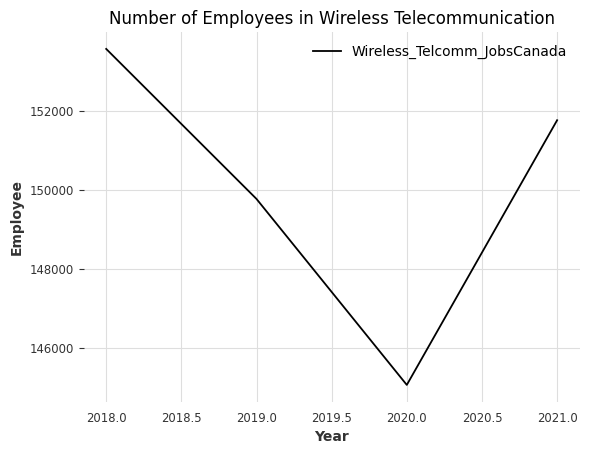

In [225]:
#GDPdata['Wireline_revenue_total']
GDPImpact = Revised_GDPdata.iloc[22:26]
TelecommEmployment = Revised_GDPdata.iloc[5:27]
TelecommCapex = Revised_GDPdata.iloc[18:27]

GDPImpact.plot(x="Year", y="Wireless_Telcomm_JobsCanada")

plt.xlabel('Year')
plt.ylabel('Employee')
 
# displaying the title
plt.title("Number of Employees in Wireless Telecommunication")
 
plt.show()

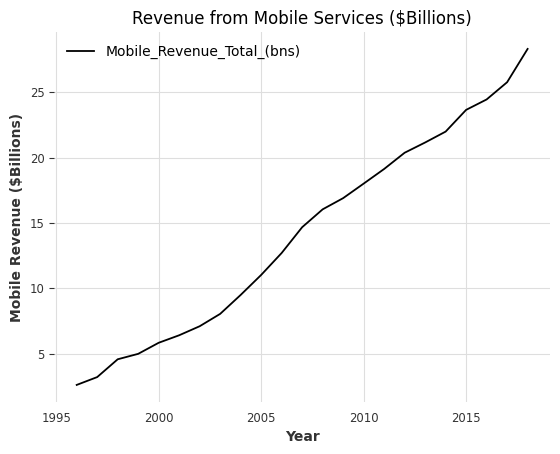

In [226]:
Revised_GDPdata.iloc[0:23].plot(x='Year', y='Mobile_Revenue_Total_(bns)')
plt.xlabel('Year')
plt.ylabel('Mobile Revenue ($Billions)')

plt.title("Revenue from Mobile Services ($Billions)")

plt.show()

Text(0.5, 1.0, 'Wireline Revenue for Canadian Companies between 1996 - 2022')

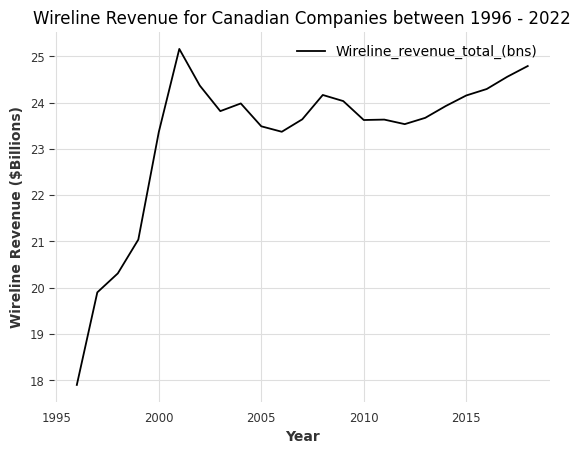

In [227]:
Revised_GDPdata.iloc[0:23].plot(x='Year', y='Wireline_revenue_total_(bns)')
plt.xlabel('Year')
plt.ylabel('Wireline Revenue ($Billions)')
plt.title('Wireline Revenue for Canadian Companies between 1996 - 2022')

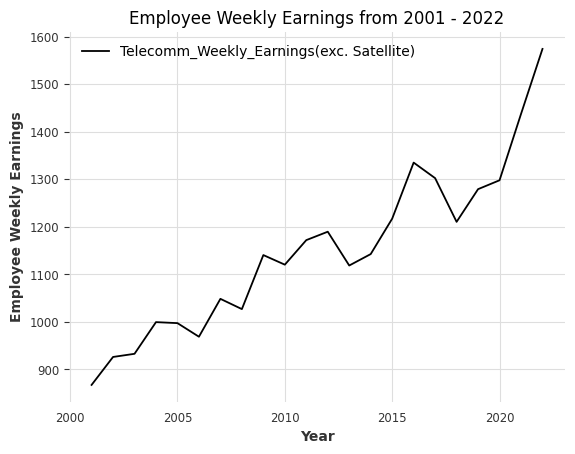

In [228]:
TelecommEmployment.plot(x="Year", y="Telecomm_Weekly_Earnings(exc. Satellite)")
plt.xlabel('Year')
plt.ylabel('Employee Weekly Earnings')

plt.title("Employee Weekly Earnings from 2001 - 2022")

plt.show()

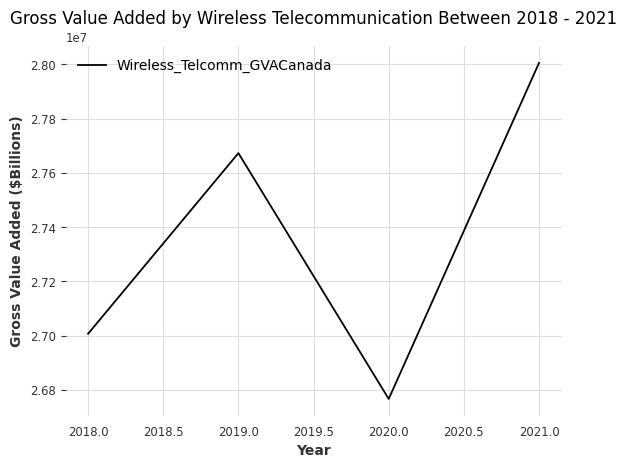

In [229]:
GDPImpact.plot(x="Year", y="Wireless_Telcomm_GVACanada")
plt.xlabel('Year')
plt.ylabel('Gross Value Added ($Billions)')
 
# displaying the title
plt.title("Gross Value Added by Wireless Telecommunication Between 2018 - 2021")
 
plt.show()

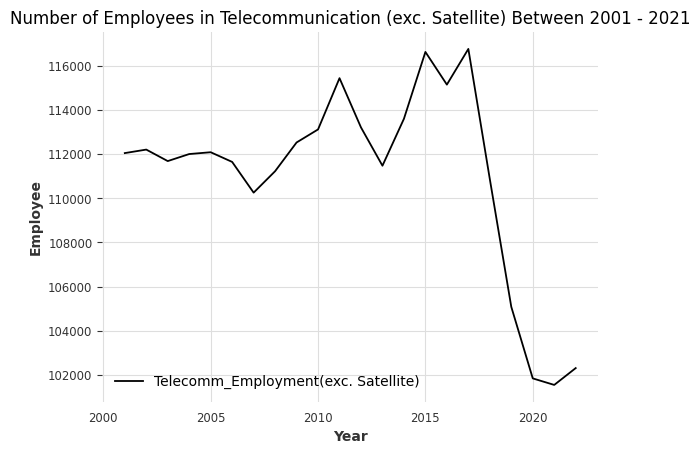

In [230]:
TelecommEmployment.plot(x="Year", y="Telecomm_Employment(exc. Satellite)")
plt.xlabel('Year')
plt.ylabel('Employee')
 
# displaying the title
plt.title("Number of Employees in Telecommunication (exc. Satellite) Between 2001 - 2021")
 
plt.show()

In [231]:
TelecommCapex.reset_index(drop=True)

,Year,Canada_Population,National_Employment_rate (x1000),Wireline_revenue_total_(bns),Mobile_Revenue_Total_(bns),Telecomm_Revenue_Growth,Total_Telecomm_Revenue (bns),Telecomm_Employment(exc. Satellite),Telecomm_Weekly_Earnings(exc. Satellite),Telecomm_capex_wireline_(bns),...,Wireless_Telcomm_JobsCanada,Wireless_Telcomm_DirectOutputCanada,Wireless_Telcomm_DirectGVACanada,Wireless_Telcomm_DirectJobsCanada,Wireless_Telcomm_IndirectOutputCanada,Wireless_Telcomm_IndirectGVACanada,Wireless_Telcomm_IndirectJobsCanada,Wireless_Telcomm_InducedOutputCanada,Wireless_Telcomm_InducedGVACanada,Wireless_Telcomm_InducedJobsCanada
0,2014,35555305,17860.2,23.926,21.984,2.4,45.909,113604.0,1142.51,7.047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,35823591,17905.0,24.154,23.647,4.1,47.801,116634.0,1217.01,8.243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,36257421,18141.2,24.294,24.444,2,48.738,115153.0,1334.94,9.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,36722075,18631.9,24.558,25.763,3.2,50.321,116770.0,1302.22,9.722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,37259485,18932.4,24.790,28.311,5.6,53.101,110872.0,1210.30,9.663,...,153572.0,28163819.0,16203817.0,60158.0,13078447.0,6949930.0,60622.0,6617375.0,3853477.0,34989.0
5,2019,37828162,19198.7,25.320,28.900,2.10,54.223,105084.0,1279.06,8.905,...,149773.0,28712696.0,17104672.0,59399.0,12464040.0,6716357.0,56191.0,6572982.0,3851579.0,34183.0
6,2020,38027406,18539.8,25.496,27.933,-1.50,53.429,101842.0,1297.75,8.597,...,145063.0,27783773.0,16537537.0,57522.0,12065571.0,6501721.0,54418.0,6364101.0,3727919.0,33123.0
7,2021,38451454,19493.6,26.033,29.190,3.40,55.223,101546.0,1437.21,9.505,...,151766.0,29076243.0,17300633.0,60158.0,12626946.0,6804328.0,56943.0,6659114.0,3899911.0,34665.0
8,2022,39276140,19907.4,26.300,30.854,3.50,57.153,102309.0,1574.05,10.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
0 in TelecommCapex.index

False

In [233]:
TelecommCapex['Telecomm_capex_wireless_(bns)']

18    2.271
19    2.219
20    2.325
21    2.339
22    2.699
23    2.941
24    2.769
25    3.665
26    3.786
Name: Telecomm_capex_wireless_(bns), dtype: float64

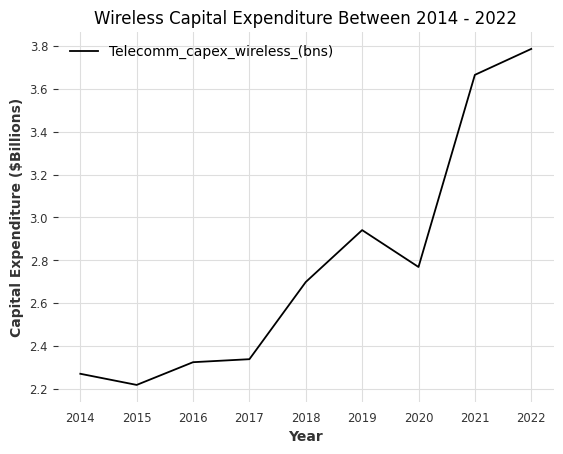

In [234]:
TelecommCapex.plot(x="Year", y="Telecomm_capex_wireless_(bns)")
plt.xlabel('Year')
plt.ylabel('Capital Expenditure ($Billions)')
 
# displaying the title
plt.title("Wireless Capital Expenditure Between 2014 - 2022")
 
plt.show()

In [235]:
TelecommCapex.head()

,Year,Canada_Population,National_Employment_rate (x1000),Wireline_revenue_total_(bns),Mobile_Revenue_Total_(bns),Telecomm_Revenue_Growth,Total_Telecomm_Revenue (bns),Telecomm_Employment(exc. Satellite),Telecomm_Weekly_Earnings(exc. Satellite),Telecomm_capex_wireline_(bns),...,Wireless_Telcomm_JobsCanada,Wireless_Telcomm_DirectOutputCanada,Wireless_Telcomm_DirectGVACanada,Wireless_Telcomm_DirectJobsCanada,Wireless_Telcomm_IndirectOutputCanada,Wireless_Telcomm_IndirectGVACanada,Wireless_Telcomm_IndirectJobsCanada,Wireless_Telcomm_InducedOutputCanada,Wireless_Telcomm_InducedGVACanada,Wireless_Telcomm_InducedJobsCanada
18,2014,35555305,17860.2,23.926,21.984,2.4,45.909,113604.0,1142.51,7.047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2015,35823591,17905.0,24.154,23.647,4.1,47.801,116634.0,1217.01,8.243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2016,36257421,18141.2,24.294,24.444,2,48.738,115153.0,1334.94,9.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2017,36722075,18631.9,24.558,25.763,3.2,50.321,116770.0,1302.22,9.722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2018,37259485,18932.4,24.790,28.311,5.6,53.101,110872.0,1210.30,9.663,...,153572.0,28163819.0,16203817.0,60158.0,13078447.0,6949930.0,60622.0,6617375.0,3853477.0,34989.0


In [236]:
print(list(TelecommCapex.columns))

['Year', 'Canada_Population ', 'National_Employment_rate (x1000)', 'Wireline_revenue_total_(bns)', 'Mobile_Revenue_Total_(bns)', 'Telecomm_Revenue_Growth', 'Total_Telecomm_Revenue (bns)', 'Telecomm_Employment(exc. Satellite)', 'Telecomm_Weekly_Earnings(exc. Satellite)', 'Telecomm_capex_wireline_(bns)', 'Telecomm_capex_wireless_(bns)', 'GDP_All_Industries_basic_prices_Canada', 'GDP_Telecomm', 'Canada_GDP', 'Canadian_Access_to_5G', 'Retail_Mobile_Subscribers', 'Wireless_Telcomm_OutputCanada', 'Wireless_Telcomm_GVACanada', 'Wireless_Telcomm_JobsCanada', 'Wireless_Telcomm_DirectOutputCanada', 'Wireless_Telcomm_DirectGVACanada', 'Wireless_Telcomm_DirectJobsCanada', 'Wireless_Telcomm_IndirectOutputCanada', 'Wireless_Telcomm_IndirectGVACanada', 'Wireless_Telcomm_IndirectJobsCanada', 'Wireless_Telcomm_InducedOutputCanada', 'Wireless_Telcomm_InducedGVACanada', 'Wireless_Telcomm_InducedJobsCanada']


In [237]:
print(TelecommCapex.iloc[:, 27:30])

    Wireless_Telcomm_InducedJobsCanada
18                                 0.0
19                                 0.0
20                                 0.0
21                                 0.0
22                             34989.0
23                             34183.0
24                             33123.0
25                             34665.0
26                                 0.0


In [238]:
#Develops a heatmap showing the correlation between the attributes
plt.figure(figsize=(10,8), dpi =800)
sn.heatmap(TelecommCapex.corr(),fmt=".2f", linewidth=.8)
results_path = 'results.png'
#print(results_path)
plt.savefig(results_path, bbox_inches='tight')
plt.show()

In [1163]:
# Splitting data into features (X) and target (y) for GDP, Direct Impact, Indirect Impact, and Induced Impact
#Estimating the GDP of all Industries over the coming years
TelecommImpact = TelecommCapex[4:8]
TelecommImpact.reset_index(drop=True)

GDPEst = TelecommEmployment[8:20]
TelecommImpact.reset_index(drop=True)

X = TelecommImpact.drop(columns=['Canadian_Access_to_5G', 'Telecomm_Revenue_Growth','GDP_Telecomm', 'Wireless_Telcomm_DirectOutputCanada','Wireless_Telcomm_DirectGVACanada','Wireless_Telcomm_DirectJobsCanada', 
                               'Wireless_Telcomm_IndirectOutputCanada','Wireless_Telcomm_IndirectGVACanada', 'Wireless_Telcomm_IndirectJobsCanada', 
                                   'Wireless_Telcomm_InducedOutputCanada', 'Wireless_Telcomm_InducedGVACanada', 'Wireless_Telcomm_InducedJobsCanada', 'GDP_All_Industries_basic_prices_Canada',
                                'Wireless_Telcomm_GVACanada','Wireless_Telcomm_JobsCanada', 'Wireless_Telcomm_OutputCanada', 'Canadian_Access_to_5G',
                                'Telecomm_Employment(exc. Satellite)', 'Canada_Population ','Telecomm_Weekly_Earnings(exc. Satellite)', 'GDP_All_Industries_basic_prices_Canada'])

X_GDP = pd.DataFrame(GDPEst['Year'])
#X = TelecommImpact['Year'].values
y_gdp = GDPEst['GDP_Telecomm'].values

y_closed_output = TelecommImpact['Wireless_Telcomm_OutputCanada'].values
y_closed_gva = TelecommImpact["Wireless_Telcomm_GVACanada"].values
y_closed_jobs = TelecommImpact["Wireless_Telcomm_JobsCanada"].values

y_direct_output =  TelecommImpact['Wireless_Telcomm_DirectOutputCanada'].values
y_direct_gva = TelecommImpact['Wireless_Telcomm_DirectGVACanada'].values
y_direct_jobs = TelecommImpact['Wireless_Telcomm_DirectJobsCanada'].values

y_indirect_output = TelecommImpact['Wireless_Telcomm_IndirectOutputCanada'].values
y_indirect_gva = TelecommImpact['Wireless_Telcomm_IndirectGVACanada'].values
y_indirect_jobs = TelecommImpact['Wireless_Telcomm_IndirectJobsCanada'].values

y_induced_output = TelecommImpact['Wireless_Telcomm_InducedOutputCanada'].values
y_induced_gva = TelecommImpact['Wireless_Telcomm_InducedGVACanada'].values
y_induced_jobs = TelecommImpact['Wireless_Telcomm_InducedJobsCanada'].values
# Splitting data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_gdp, test_size=0.5, random_state=0)

In [1164]:
# Create linear regression models for each target
model_gdp = LinearRegression().fit(X_GDP, y_gdp)

model_closed_output = LinearRegression().fit(X, y_closed_output)
model_closed_gva = LinearRegression().fit(X, y_closed_gva)
model_closed_jobs =LinearRegression().fit(X, y_closed_jobs)

model_direct_output = LinearRegression().fit(X, y_direct_output)
model_direct_gva = LinearRegression().fit(X, y_direct_gva)
model_direct_jobs = LinearRegression().fit(X, y_direct_jobs)

model_indirect_output = LinearRegression().fit(X, y_indirect_output)
model_indirect_gva = LinearRegression().fit(X, y_indirect_gva)
model_indirect_jobs = LinearRegression().fit(X, y_indirect_jobs)

model_induced_output = LinearRegression().fit(X, y_induced_output)
model_induced_gva = LinearRegression().fit(X, y_induced_gva)
model_induced_jobs = LinearRegression().fit(X, y_induced_jobs)

In [1068]:
#Displaying the Intercepts and Coefficients for each Linear Regression Model
GDP_intercept = model_gdp.intercept_
GDP_coef = model_gdp.coef_

Direct_output_intercept = model_direct_output.intercept_
Direct_output_coef = model_direct_output.coef_
Direct_gva_intercept = model_direct_gva.intercept_
Direct_gva_coef = model_direct_gva.coef_
Direct_jobs_intercept = model_direct_jobs.intercept_
Direct_jobs_coef = model_direct_jobs.coef_

Indirect_output_intercept = model_indirect_output.intercept_
Indirect_output_coef = model_indirect_output.coef_
Indirect_gva_intercept = model_indirect_gva.intercept_
Indirect_gva_coef = model_indirect_gva.coef_
Indirect_jobs_intercept = model_indirect_jobs.intercept_
Indirect_jobs_coef = model_indirect_jobs.coef_

Induced_output_intercept = model_induced_output.intercept_
Induced_output_coef = model_induced_output.coef_
Induced_gva_intercept = model_induced_gva.intercept_
Induced_gva_coef = model_induced_gva.coef_
Induced_jobs_intercept = model_induced_jobs.intercept_
Induced_jobs_coef = model_induced_jobs.coef_

print(f'Telecommunication GDP Impact Intercept: {GDP_intercept}')
print(f'Telecommunication GDP Impact Coefficient: {GDP_coef}')

Telecommunication GDP Impact Intercept: -1451238.3240093237
Telecommunication GDP Impact Coefficient: [737.16258741]


In [1069]:
#Direct Intercept and Coefficient
print(f'Direct Output Intercept: {Direct_output_intercept}')
print(f'Direct Output Coefficient: {Direct_output_coef}')
print(f'Direct Gross Value Added Intercept: {Direct_gva_intercept}')
print(f'Direct Gross Value Added Coefficient: {Direct_gva_coef}')
print(f'Direct Jobs Intercept: {Direct_jobs_intercept}')
print(f'Direct Jobs Coefficient: {Direct_jobs_coef}')

Direct Output Intercept: -1140691.56728594
Direct Output Coefficient: [ 2.82106813e+01  2.15400454e+03  1.12517905e+01  4.45872671e+00
  1.57123478e+01 -5.88999442e+00  6.66064991e+00 -1.04499083e+01
  3.44849239e-01]
Direct Gross Value Added Intercept: -12853260.05763869
Direct Gross Value Added Coefficient: [ 5.46851262e+01  4.17522191e+03  2.18110833e+01  8.64282761e+00
  3.04574604e+01 -1.14180163e+01  1.29111601e+01 -4.26368065e+01
  1.31539233e+00]
Direct Jobs Intercept: 38988.33076638552
Direct Jobs Coefficient: [-6.90986181e-02 -5.27525029e+00 -2.75598793e-02 -1.09204066e-02
 -3.84847729e-02  1.44285702e-02 -1.63137624e-02  9.95217143e-02
 -2.94273130e-03]


In [1070]:
#Indirect Intercept and Coefficient
print(f'Indirect Output Intercept: {Indirect_output_intercept}')
print(f'Indirect Output Coefficient: {Indirect_output_coef}')
print(f'Indirect Gross Value Added Intercept: {Indirect_gva_intercept}')
print(f'Indirect Gross Value Added Coefficient: {Indirect_gva_coef}')
print(f'Indirect Jobs Intercept: {Indirect_jobs_intercept}')
print(f'Indirect Jobs Coefficient: {Indirect_jobs_coef}')

Indirect Output Intercept: 17894706.32129278
Indirect Output Coefficient: [-4.54292672e+01 -3.46838832e+03 -1.81193959e+01 -7.17982321e+00
 -2.53021685e+01  9.48578894e+00 -1.07257119e+01  5.04615138e+01
 -1.50724906e+00]
Indirect Gross Value Added Intercept: 7532519.347800277
Indirect Gross Value Added Coefficient: [-1.78386563e+01 -1.36191762e+03 -7.11492155e+00 -2.81928265e+00
 -9.93536237e+00  3.72479843e+00 -4.21164275e+00  2.08702930e+01
 -6.22370738e-01]
Indirect Jobs Intercept: 116520.38557548629
Indirect Jobs Coefficient: [-3.16510045e-01 -2.41647635e+01 -1.26239564e-01 -5.00226800e-02
 -1.76282792e-01  6.60879836e-02 -7.47272221e-02  3.34056643e-01
 -1.00138368e-02]


In [1071]:
#Induced Intercept and Coefficient
print(f'Induced Output Intercept: {Induced_output_intercept}')
print(f'Induced Output Coefficient: {Induced_output_coef}')
print(f'Induced Gross Value Added Intercept: {Induced_gva_intercept}')
print(f'Induced Gross Value Added Coefficient: {Induced_gva_coef}')
print(f'Induced Jobs Intercept: {Induced_jobs_intercept}')
print(f'Induced Jobs Coefficient: {Induced_jobs_coef}')

Induced Output Intercept: 3403550.3372468613
Induced Output Coefficient: [-4.89881543e+00 -3.73980490e+02 -1.95388499e+00 -7.74199870e-01
 -2.72840303e+00  1.02296095e+00 -1.15656747e+00  8.45466662e+00
 -2.49716009e-01]
Induced Gross Value Added Intercept: 1499050.5703411303
Induced Gross Value Added Coefficient: [-1.34585837e+00 -1.02733037e+02 -5.36793426e-01 -2.12686186e-01
 -7.49567072e-01  2.81066511e-01 -3.17734785e-01  3.46565590e+00
 -1.00001067e-01]
Induced Jobs Intercept: 29792.63817228943
Induced Jobs Coefficient: [-6.25990870e-02 -4.77915200e+00 -2.49675521e-02 -9.89331259e-03
 -3.48649292e-02  1.30711510e-02 -1.47793585e-02  7.98481341e-02
 -2.40386941e-03]


In [1153]:
# Split data into training and testing sets for each dependent variable
X_train, X_test, y_gdp_train, y_gdp_test = train_test_split(X_GDP, y_gdp, test_size=0.2, random_state=0)

In [1154]:
y_pred = model_gdp.predict(X_test)
y_pred

array([34144.28962704, 37830.1025641 , 32669.96445221])

In [1155]:
#Evaluating the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_gdp_test, y_pred)
mae = mean_absolute_error(y_gdp_test, y_pred)
r2 = r2_score(y_gdp_test, y_pred)
regConfidence = model_gdp.score(X_test, y_gdp_test)

print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

linear regression confidence:  0.9011980072565686
Mean Squared Error: 722039.0407775505
Mean Absolute Error: 735.5171717170464
R-squared: 0.9011980072565686


In [1156]:
def LOBF(x):
  return slope * x + intercept 

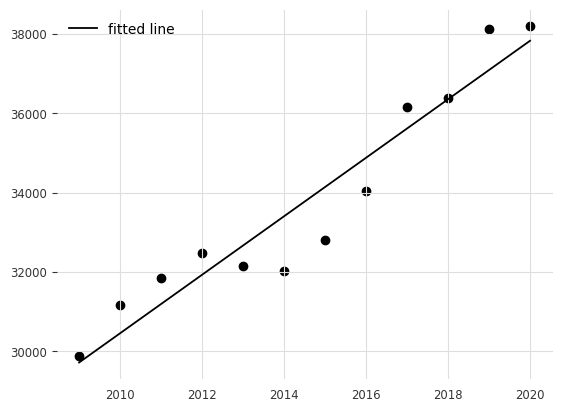

In [1157]:
from scipy import stats
X_GDP_year = X_GDP["Year"].values
slope, intercept, r, p, std_err = stats.linregress(X_GDP_year, y_gdp)

mymodel = list(map(LOBF, X_GDP_year))
plt.scatter(X_GDP_year, y_gdp)
plt.plot(X_GDP_year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1158]:
def LOBFest(intercept, slope, std_err, x, y):
    X = x.iloc[-1].values
    Y = y[-1]
    date = []
    
    growth_estimate = pd.DataFrame(columns=['Year', 'GDP_Telecomm'])
    
    start_date = int(X) + 1
    
    for i in range(start_date, 2036):
        date.append(i)
        
    n = 0
    
    for i in date:
        y = slope * i + intercept + std_err
        grow_temp = pd.DataFrame({"Year" : i, "GDP_Telecomm": y}, index = [n]) 
        #growth_estimate.loc[len(growth_estimate)] = pd.Series['Year' : i, 'GDP_Telecomm': y]
        growth_estimate = pd.concat([growth_estimate, grow_temp])
        n = n + 1    
    
    return growth_estimate

In [1159]:
#calculate future estimates from 2024 - 2035
GDP_future = LOBFest(intercept, slope, std_err, X_GDP, y_gdp)
gtemp = GDPEst[['Year', 'GDP_Telecomm']]

#GDP_est_future = [gtemp, GDP_future]
estimate_GDP_future = pd.concat(GDP_est_future)
estimate_GDP_future.reset_index(drop=True)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
estimate_GDP_future.to_csv('Estimated GDP of the Telecommunication Sector from 2021 - 2035.csv', index = False)

#estimate_GDP_future.plot(x="Year", y="GDP_Telecomm")

#plt.xlabel('Year')
#plt.ylabel('Estimated GDP of the Telecommunication Sector')
#plt.scatter(X_GDP_year, y_gdp)
#plt.scatter(X_GDP, )
#plt.plot(X_GDP_year, mymodel, label='fitted line')

# displaying the title
#plt.title("Estimated GDP of the Telecommunication Sector from 2021 - 2035")
 
#plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1079]:
X_train_direct, X_test_direct, y_direct_train, y_direct_test = train_test_split(X, y_direct_output, test_size=0.2, random_state=0)

In [1080]:
y_pred_direct = model_direct_output.predict(X_test_direct)
y_pred_direct

array([27783773.00000001])

In [1098]:
#Evaluating the model
mse = mean_squared_error(y_direct_test, y_pred_direct)
mae = mean_absolute_error(y_direct_test, y_pred_direct)
r2 = r2_score(y_direct_test, y_pred_direct)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

linear regression confidence:  0.9011980072565686
Mean Squared Error: 2.220446049250313e-16
Mean Absolute Error: 1.4901161193847656e-08
R-squared: nan


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


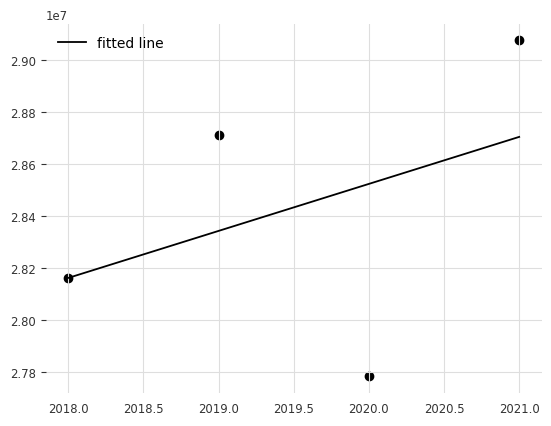

In [1099]:
X_direct_output_year = X["Year"].values
slope, intercept, r, p, std_err = stats.linregress(X_direct_output_year, y_direct_output)

mymodel = list(map(LOBF, X_direct_output_year))
plt.scatter(X_direct_output_year, y_direct_output)
plt.plot(X_direct_output_year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1100]:
#calculate future estimates from 2024 - 2035
X_direct_output_year = pd.DataFrame(X["Year"])
Direct_output_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_direct_output)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Direct_output_future.to_csv('Estimated Direct Output of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1101]:
X_train_direct_gva, X_test_direct_gva, y_test_direct_gva, y_test_direct_gva = train_test_split(X, y_direct_gva, test_size=0.2, random_state=0)

In [1102]:
y_pred_direct_gva = model_direct_gva.predict(X_test_direct_gva)
y_pred_direct_gva

array([16537537.00000004])

In [1103]:
#Evaluating the model
mse = mean_squared_error(y_test_direct_gva, y_pred_direct_gva)
mae = mean_absolute_error(y_test_direct_gva, y_pred_direct_gva)
r2 = r2_score(y_test_direct_gva, y_pred_direct_gva)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

linear regression confidence:  0.9011980072565686
Mean Squared Error: 1.9984014443252818e-15
Mean Absolute Error: 4.470348358154297e-08
R-squared: nan


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


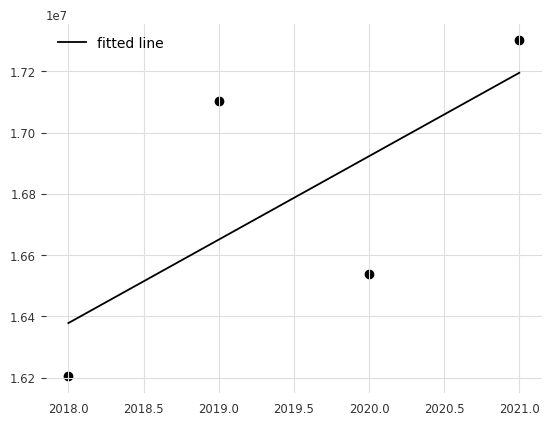

In [1104]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_direct_gva)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_direct_gva)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1105]:
#calculate future estimates from 2024 - 2035
X_direct_output_year = pd.DataFrame(X["Year"])
Direct_output_gva_future = LOBFest(intercept_dgva, slope_dgva, std_err_dgva, X_direct_output_year, y_direct_gva)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Direct_output_gva_future.to_csv('Estimated Direct Gross Value Added of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1106]:
X_train_direct_job, X_test_direct_job, y_direct_job_train, y_direct_job_test = train_test_split(X, y_direct_jobs, test_size=0.2, random_state=0)

In [1107]:
y_pred_direct_job = model_direct_jobs.predict(X_test_direct_job)
y_pred_direct_job

array([57522.])

In [1108]:
#Evaluating the model
mse = mean_squared_error(y_direct_job_test, y_pred_direct_job)
mae = mean_absolute_error(y_direct_job_test, y_pred_direct_job)
r2 = r2_score(y_direct_job_test, y_pred_direct_job)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

linear regression confidence:  0.9011980072565686
Mean Squared Error: 5.293955920339377e-21
Mean Absolute Error: 7.275957614183426e-11
R-squared: nan


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


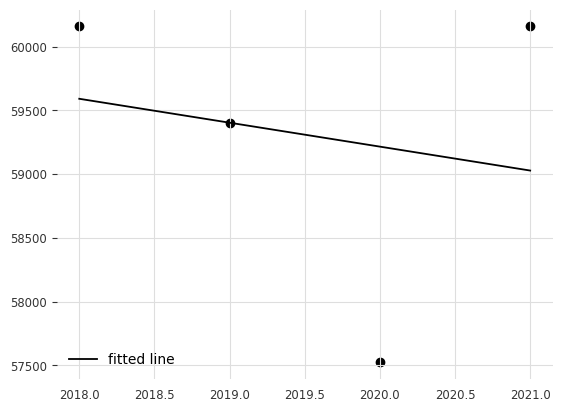

In [1109]:
X_Absolute_Year = [2018, 2019, 2020, 2021]
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_direct_jobs)

mymodel_job = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_direct_jobs)
plt.plot(X_Absolute_Year, mymodel_job, label='fitted line')
plt.legend()
plt.show()

In [1110]:
y_direct_jobs

array([60158., 59399., 57522., 60158.])

In [1111]:
#calculate future estimates from 2024 - 2035
Direct_output_jobs_future = LOBFest(intercept_djob, slope_djob, std_err_djob, X_direct_output_year, y_direct_jobs)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Direct_output_jobs_future.to_csv('Estimated Direct Jobs Added of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1112]:
X_indirect_train, X_indirect_test, y_indirect_train, y_indirect_test = train_test_split(X, y_indirect_output, test_size=0.2, random_state=0)

In [1113]:
#predicting the accuracy of the dataset
y_pred_indirect_output = model_indirect_output.predict(X_test_direct_job)
y_pred_indirect_output

array([12065571.00000001])

In [1114]:
#Evaluating the model
mse = mean_squared_error(y_indirect_test, y_pred_indirect_output)
mae = mean_absolute_error(y_indirect_test, y_pred_indirect_output)
r2 = r2_score(y_indirect_test, y_pred_indirect_output)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2.220446049250313e-16
Mean Absolute Error: 1.4901161193847656e-08
R-squared: nan


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


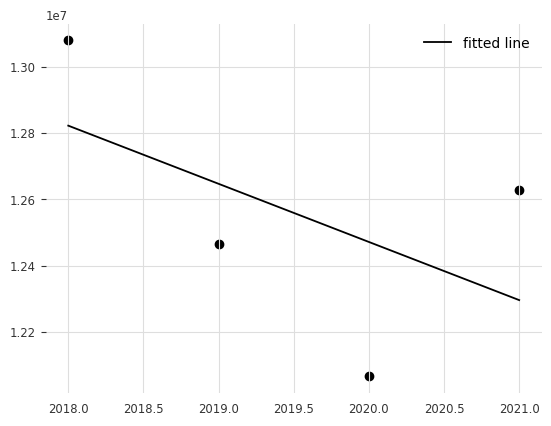

In [1115]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_indirect_output)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_indirect_output)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1116]:
#calculate future estimates from 2024 - 2035
Indirect_output_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_indirect_output)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Indirect_output_future.to_csv('Estimated Indirect Output of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1117]:
X_ingva_train, X_ingva_test, y_ingva_train, y_ingva_test = train_test_split(X, y_indirect_gva, test_size=0.2, random_state=0)

In [1118]:
#predicting the accuracy of the dataset
y_pred_indirect_gva = model_indirect_gva.predict(X_ingva_test)
y_pred_indirect_gva

array([6501721.])

In [1119]:
#Evaluating the model
mse = mean_squared_error(y_ingva_test, y_pred_indirect_gva)
mae = mean_absolute_error(y_ingva_test, y_pred_indirect_gva)
r2 = r2_score(y_ingva_test, y_pred_indirect_gva)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#print("R-squared:", r2)

Mean Squared Error: 1.3877787807814457e-17
Mean Absolute Error: 3.725290298461914e-09


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


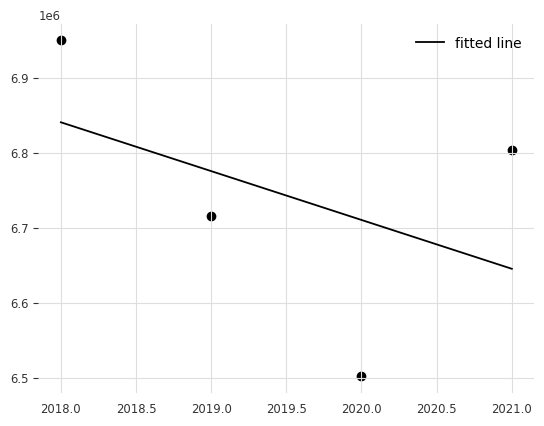

In [1120]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_indirect_gva)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_indirect_gva)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1121]:
#calculate future estimates from 2024 - 2035
Indirect_gva_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_indirect_gva)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Indirect_gva_future.to_csv('Estimated Indirect Gross Value Added of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1122]:
X_injob_train, X_injob_test, y_injob_train, y_injob_test = train_test_split(X, y_indirect_jobs, test_size=0.2, random_state=0)

In [1123]:
#predicting the accuracy of the dataset
y_pred_indirect_job = model_indirect_jobs.predict(X_injob_test)
y_pred_indirect_job

array([54418.])

In [1124]:
#Evaluating the model
mse = mean_squared_error(y_injob_test, y_pred_indirect_job)
mae = mean_absolute_error(y_injob_test, y_pred_indirect_job)
r2 = r2_score(y_injob_test, y_pred_indirect_job)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#print("R-squared:", r2)

Mean Squared Error: 3.3881317890172014e-21
Mean Absolute Error: 5.820766091346741e-11


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


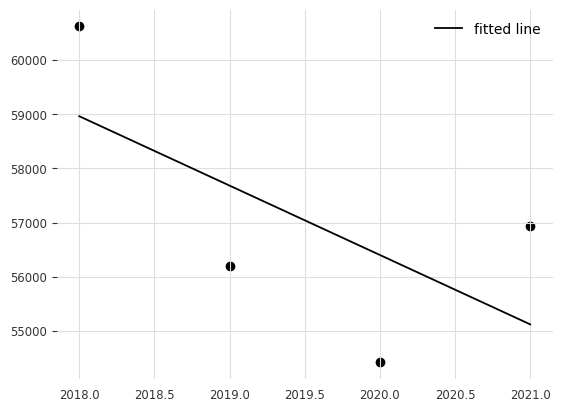

In [1125]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_indirect_jobs)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_indirect_jobs)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1126]:
#calculate future estimates from 2024 - 2035
Indirect_job_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_indirect_jobs)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Indirect_job_future.to_csv('Estimated Indirect Jobs of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1127]:
X_indout_train, X_indout_test, y_indout_train, y_indout_test = train_test_split(X, y_induced_output, test_size=0.2, random_state=0)

In [1128]:
#predicting the accuracy of the dataset
y_pred_induced_output = model_induced_output.predict(X_indout_test)
y_pred_induced_output

array([6364101.])

In [1129]:
#Evaluating the model
mse = mean_squared_error(y_indout_test, y_pred_induced_output)
mae = mean_absolute_error(y_indout_test, y_pred_induced_output)
r2 = r2_score(y_indout_test, y_pred_induced_output)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#print("R-squared:", r2)

Mean Squared Error: 3.469446951953614e-18
Mean Absolute Error: 1.862645149230957e-09


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


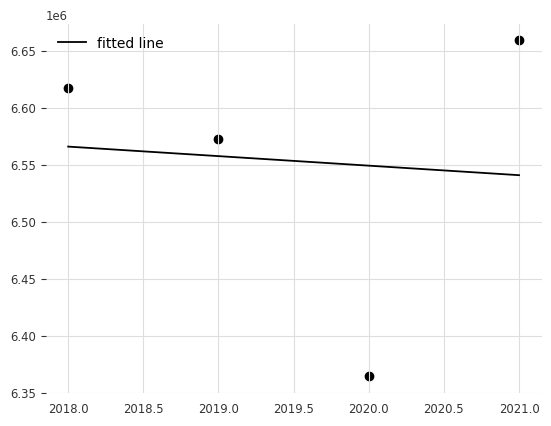

In [1130]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_induced_output)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_induced_output)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1131]:
#calculate future estimates from 2024 - 2035
Induced_output_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_induced_output)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Induced_output_future.to_csv('Estimated Induced Output of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1132]:
X_indgva_train, X_indgva_test, y_indgva_train, y_indgva_test = train_test_split(X, y_induced_gva, test_size=0.2, random_state=0)

In [1133]:
#predicting the accuracy of the dataset
y_pred_induced_gva = model_induced_gva.predict(X_indgva_test)
y_pred_induced_gva 

array([3727919.])

In [1134]:
#Evaluating the model
mse = mean_squared_error(y_indgva_test, y_pred_induced_gva)
mae = mean_absolute_error(y_indgva_test, y_pred_induced_gva)
r2 = r2_score(y_indgva_test, y_pred_induced_gva)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#print("R-squared:", r2)

Mean Squared Error: 8.673617379884035e-19
Mean Absolute Error: 9.313225746154785e-10


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


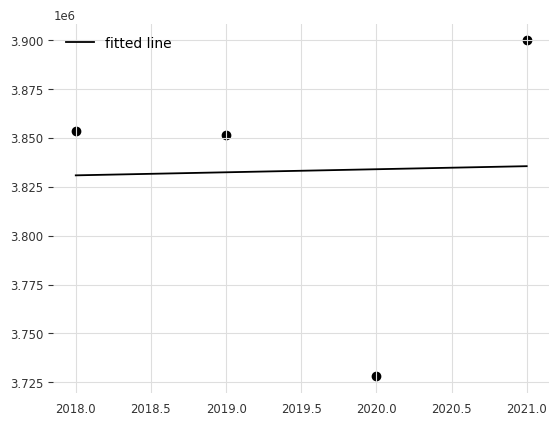

In [1135]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_induced_gva)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_induced_gva)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1136]:
#calculate future estimates from 2024 - 2035
Induced_gva_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_induced_gva)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Induced_gva_future.to_csv('Estimated Induced Gross Value Added of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1137]:
X_indjob_train, X_indjob_test, y_indjob_train, y_indjob_test = train_test_split(X, y_induced_jobs, test_size=0.2, random_state=0)

In [1138]:
#predicting the accuracy of the dataset
y_pred_induced_job = model_induced_gva.predict(X_indjob_test)
y_pred_induced_job

array([3727919.])

In [1139]:
#Evaluating the model
mse = mean_squared_error(y_indjob_test, y_pred_induced_job)
mae = mean_absolute_error(y_indjob_test, y_pred_induced_job)
r2 = r2_score(y_indjob_test, y_pred_induced_job)
#regConfidence = model_gdp.score(model_direct_output.feature_names() )

#print("linear regression confidence: ", regConfidence)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#print("R-squared:", r2)

Mean Squared Error: 13651517481616.008
Mean Absolute Error: 3694796.000000001


C:\Users\alexa\miniforge3\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


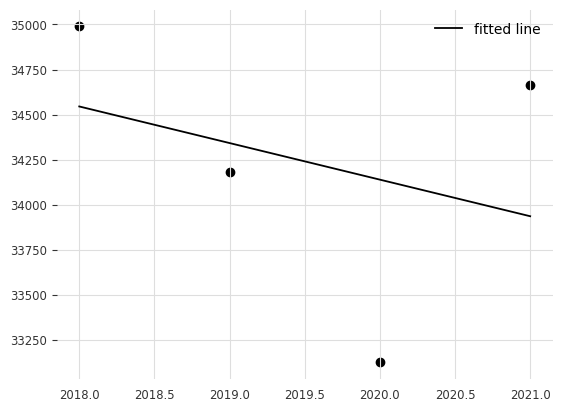

In [1140]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_induced_jobs)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_induced_jobs)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1172]:
#calculate future estimates from 2024 - 2035
Induced_job_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_induced_jobs)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Induced_job_future.to_csv('Estimated Induced Jobs of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


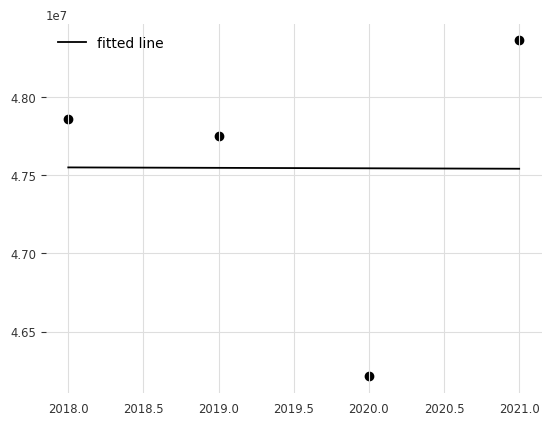

In [1173]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_closed_output)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_closed_output)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1174]:
#calculate future estimates from 2024 - 2035
Closed_output_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_closed_output)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Closed_output_future.to_csv('Estimated GDP Output in Closed Model of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


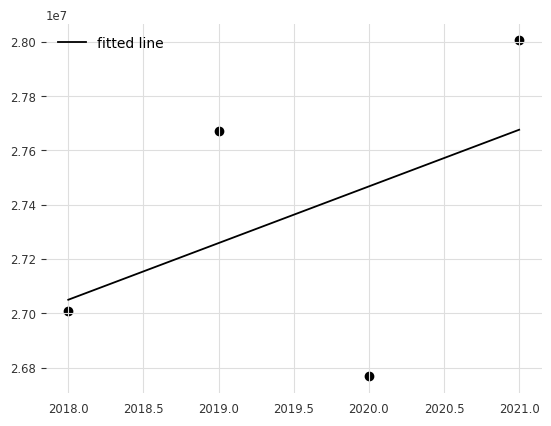

In [1175]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_closed_gva)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_closed_gva)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1176]:
#calculate future estimates from 2024 - 2035
Closed_gva_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_closed_gva)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Closed_gva_future.to_csv('Estimated Gross Value Added in Closed Model of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])


In [1177]:
y_closed_jobs

array([153572., 149773., 145063., 151766.])

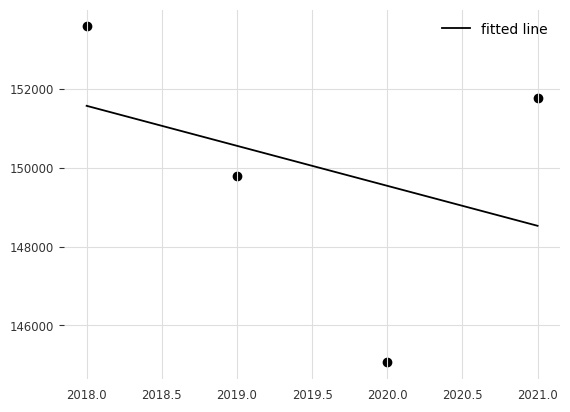

In [1178]:
slope, intercept, r, p, std_err = stats.linregress(X_Absolute_Year, y_closed_jobs)

mymodel = list(map(LOBF, X_Absolute_Year))
plt.scatter(X_Absolute_Year, y_closed_jobs)
plt.plot(X_Absolute_Year, mymodel, label='fitted line')
plt.legend()
plt.show()

In [1179]:
#calculate future estimates from 2024 - 2035
Closed_jobs_future = LOBFest(intercept, slope, std_err, X_direct_output_year, y_closed_jobs)

#Diplay Graph + Export Data, Just exports data for now, will do graph later
Closed_jobs_future.to_csv('Estimated Jobs in Closed Model of the Telecommunication Sector from 2023 - 2035.csv', index = False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date = int(X) + 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_759892\296656243.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  growth_estimate = pd.concat([growth_estimate, grow_temp])
